## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [5]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


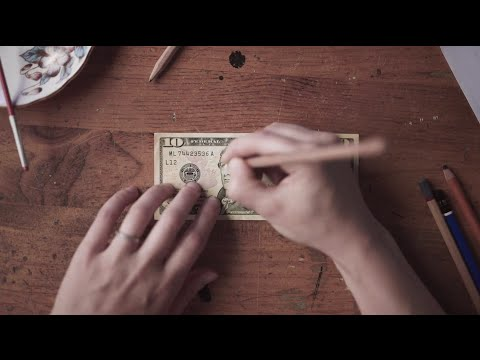

In [6]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [11]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

allmales = {'all': pd.read_excel(url + 'pinc08_2_1_1.xls', header = 9),
            'white': pd.read_excel(url + 'pinc08_2_1_4.xls', header = 9),
            'black': pd.read_excel(url + 'pinc08_2_1_6.xls', header = 9),
            'asian': pd.read_excel(url + 'pinc08_2_1_8.xls', header = 9),
            'hispanic': pd.read_excel(url + 'pinc08_2_1_9.xls', header = 9)
           }

allfemales = {'all': pd.read_excel(url + 'pinc08_3_1_1.xls', header = 9),
            'white': pd.read_excel(url + 'pinc08_3_1_4.xls', header = 9),
            'black': pd.read_excel(url + 'pinc08_3_1_6.xls', header = 9),
            'asian': pd.read_excel(url + 'pinc08_3_1_8.xls', header = 9),
            'hispanic': pd.read_excel(url + 'pinc08_3_1_9.xls', header = 9)
             }


# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [15]:
#allfemales and allmales should be dictionaries

type(allfemales)

dict

In [31]:
allfemales['all'].head(10)

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063.0,137.0,31968.0,250.0,0.495,0.0025
2,NaN,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736.0,364.0,36189.0,307.0,0.466,0.0032
3,NaN,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402.0,379.0,36412.0,316.0,0.461,0.0032
4,NaN,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732.0,399.0,20942.0,1123.0,0.650,0.0162
5,NaN,774.0,592.0,57.0,0.0,21.0,18.0,4.0,4.0,0.0,...,0.0,0.0,0.0,15.0,1635.0,65.0,7908.0,2005.0,0.916,0.0148
6,NaN,26923.0,770.0,1294.0,2750.0,5261.0,5022.0,4252.0,2990.0,1924.0,...,0.0,0.0,0.0,0.0,11686.0,70.0,12453.0,71.0,0.258,0.0025
7,NaN,3386.0,515.0,559.0,363.0,1428.0,232.0,130.0,72.0,30.0,...,0.0,0.0,0.0,0.0,7950.0,71.0,7316.0,129.0,0.315,0.0088
8,NaN,1541.0,759.0,409.0,257.0,74.0,9.0,17.0,5.0,3.0,...,0.0,0.0,0.0,0.0,2569.0,180.0,3413.0,149.0,0.464,0.0139
9,NaN,619.0,79.0,58.0,48.0,68.0,56.0,113.0,49.0,31.0,...,0.0,0.0,6.0,0.0,12501.0,760.0,13839.0,927.0,0.420,0.0288


In [17]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [37]:
allfemales.items()

[('hispanic',
      Characteristic  Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
  0              NaN                NaN                   NaN               NaN   
  1              NaN            14034.0                 983.0             783.0   
  2              NaN            10549.0                 579.0             498.0   
  3              NaN            10119.0                 534.0             489.0   
  4              NaN              567.0                 137.0              25.0   
  5              NaN               58.0                  47.0               9.0   
  6              NaN             2038.0                  72.0             181.0   
  7              NaN              612.0                  75.0             104.0   
  8              NaN              412.0                 193.0             124.0   
  9              NaN               52.0                   9.0               2.0   
  10             NaN               89.0                  23.0            

# Descriptive phase: 


In [18]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

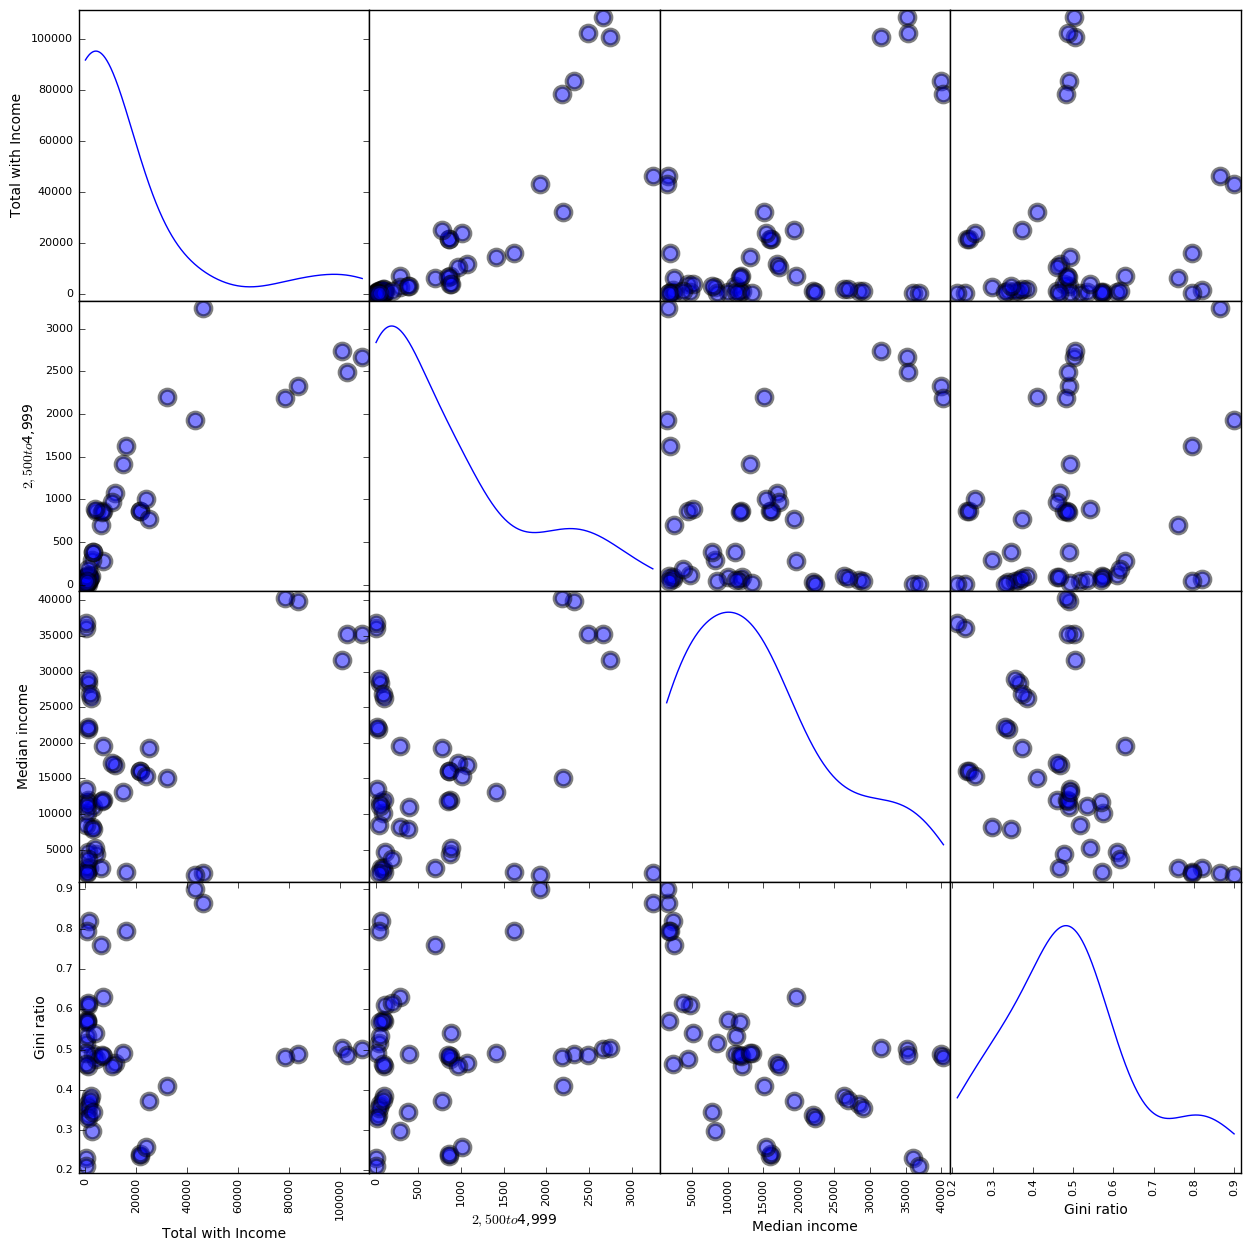

In [40]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')

In [42]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic          49
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [41]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

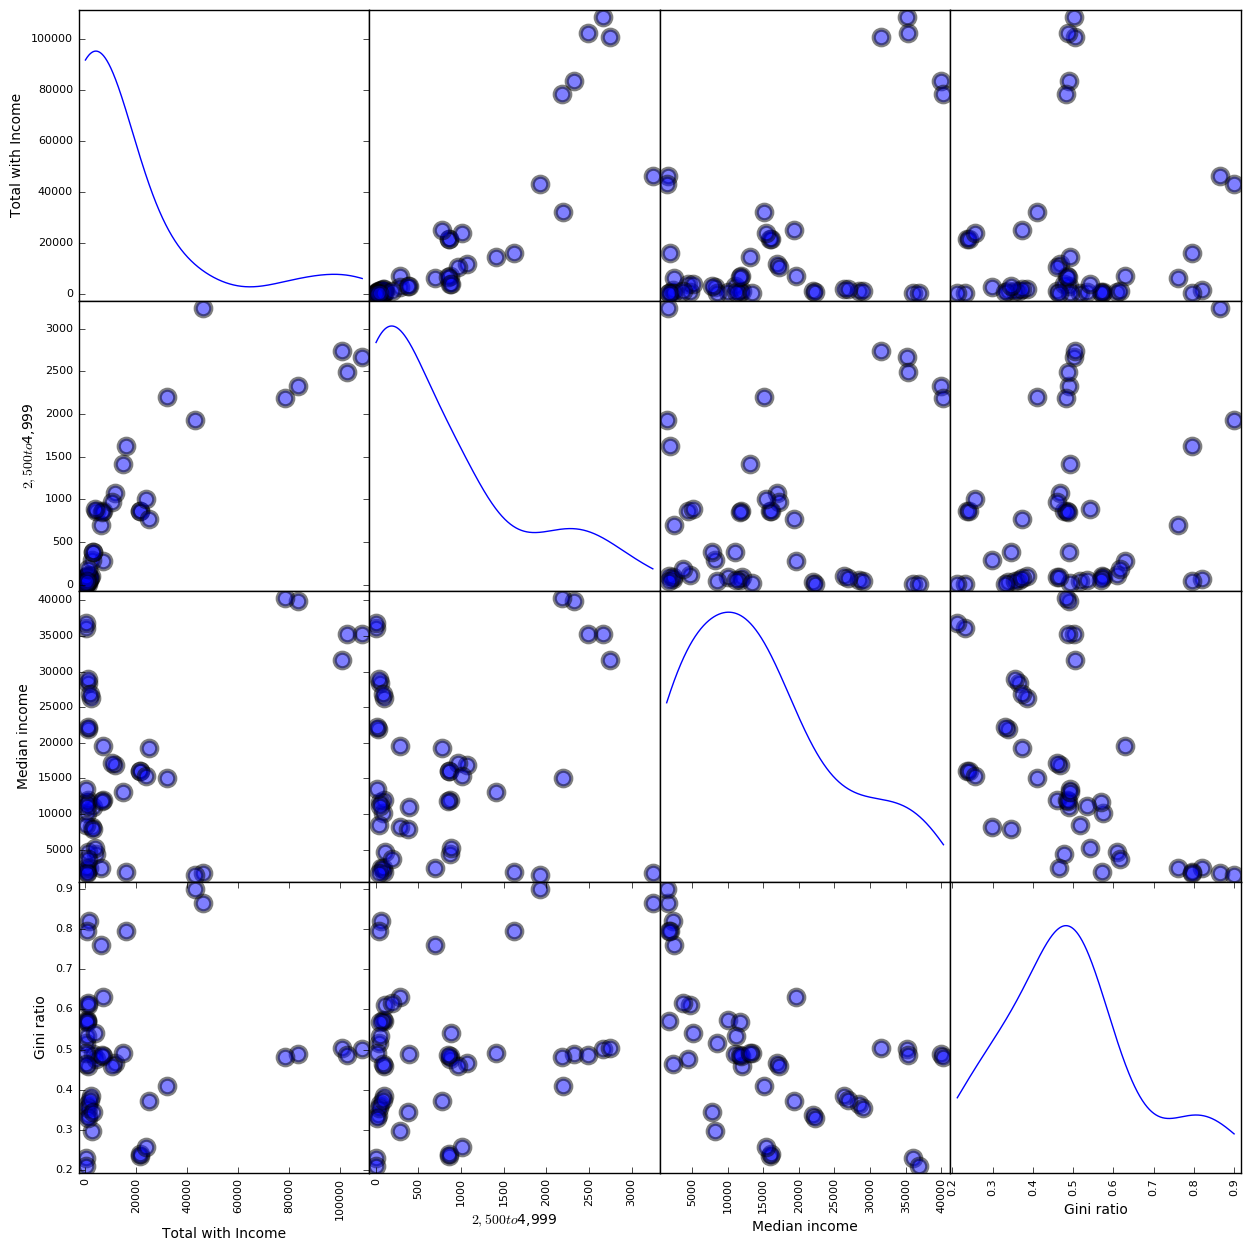

In [44]:
# use scatter_matrix to make this plot... 

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')




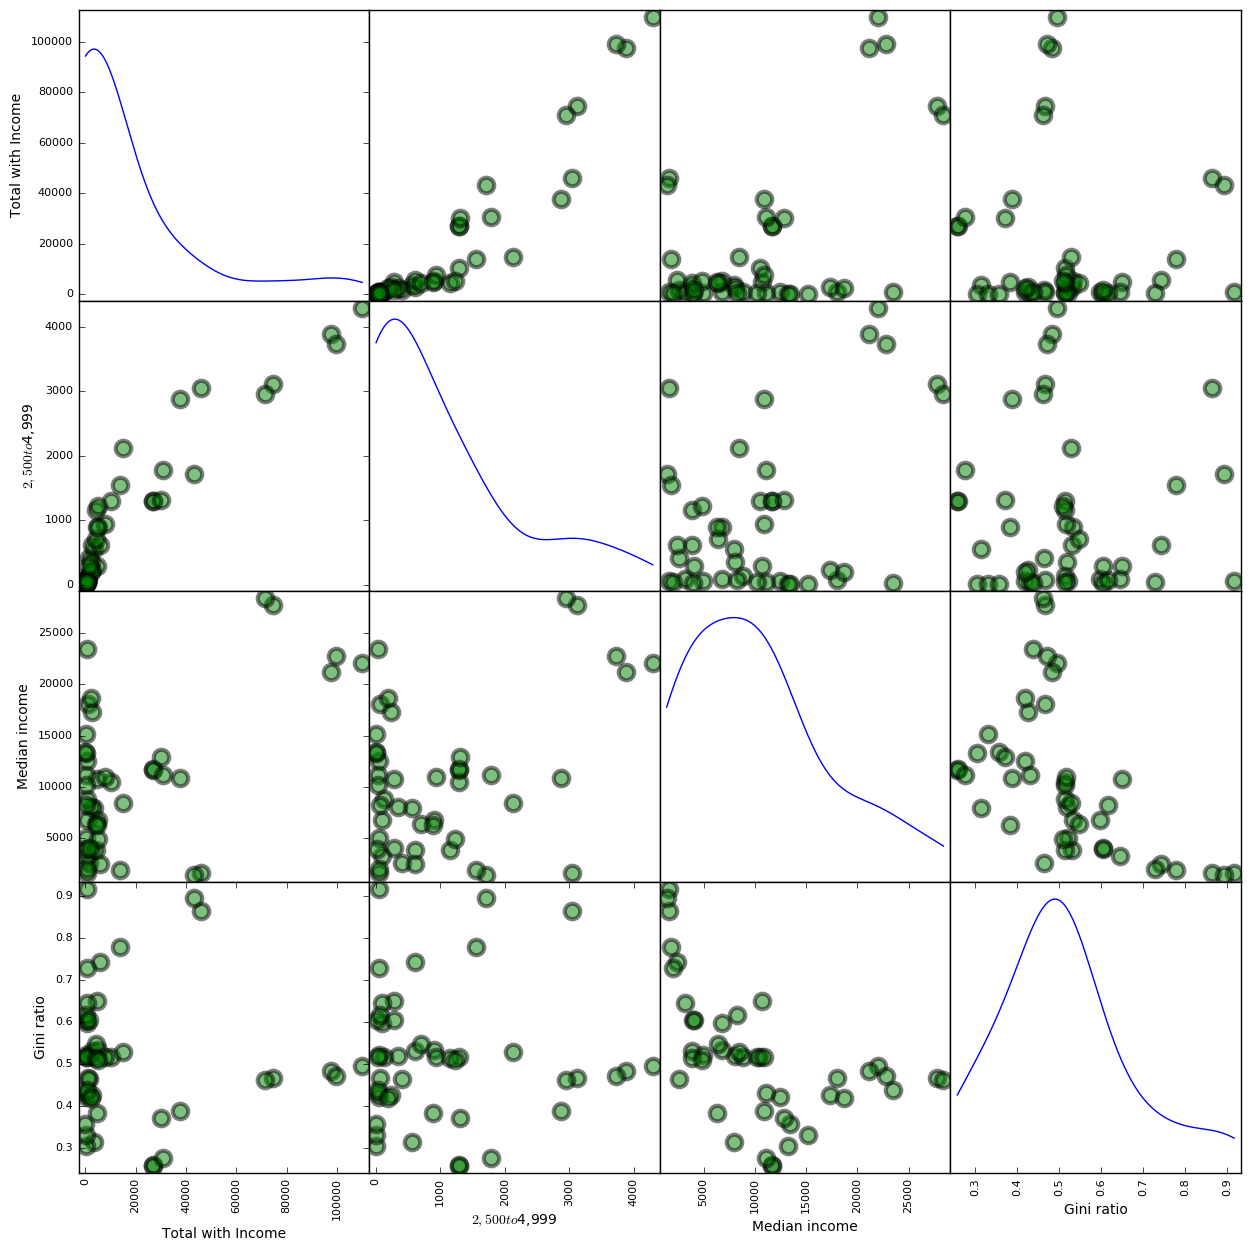

In [46]:
# do the same for all female

fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde', c = 'green')


## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

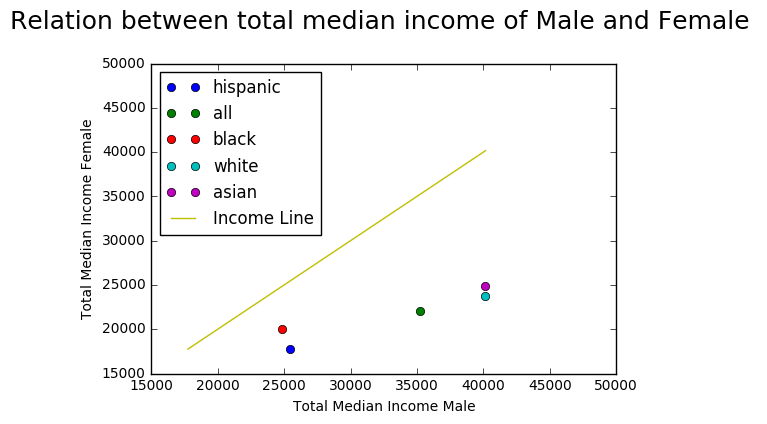

In [72]:
##plotting the Total median incame by race
##pl.scatter...
allmales.keys()

x_axis = []
y_axis = []

for k in allmales:
    x_axis.append(allmales[k]['Median income'][1])
    y_axis.append(allfemales[k]['Median income'][1])
    
    plt.plot(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],'o', label = k)
    
xy = np.arange(min(y_axis), max(x_axis), 0.1)
plt.plot(xy, xy, label='Income Line')
plt.xlim(15000,50000)
plt.ylim(15000,50000)
plt.xlabel("Total Median Income Male")
plt.ylabel("Total Median Income Female")
plt.title("Relation between total median income of Male and Female \n", size = 18)
plt.legend(loc = 'upper left')

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

predicted values by Regression Model :  [ 16322.03580834  22627.70758554  15964.90496306  25771.22981001
  25791.1417816 ]
predicted values by Regression model :  [ 0.64232166]
Results  LinregressResult(slope=0.35314068346940902, intercept=9989.8444083919057, rvalue=0.93982358317844372, pvalue=0.017559570692699086, stderr=0.07411994131634865)


(15000, 50000)

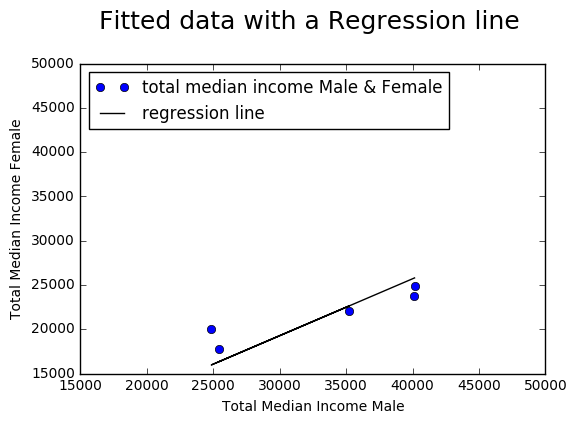

In [75]:
#fit with whichever method you prefer and plot here
#[...]

import statsmodels.api as sm
regress = sm.OLS(np.array(y_axis), np.array(x_axis)).fit()

print("predicted values by Regression Model : ", regress.predict())
print("predicted values by Regression model : ", regress.params)
print("Results ",stats.linregress(x_axis,y_axis)) #gives you slope, intercept, rvalue
plt.plot(x_axis,y_axis, 'bo', label = 'total median income Male & Female')
plt.plot(x_axis, regress.predict(), 'k-', label = 'regression line')
plt.xlabel("Total Median Income Male")
plt.ylabel("Total Median Income Female")
plt.title("Fitted data with a Regression line \n", size = 18)
plt.legend(loc = 'upper left')
plt.xlim(15000,50000)
plt.ylim(15000,50000)

In [76]:
regress.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     395.4
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           3.77e-05
Time:                        18:58:20   Log-Likelihood:                -45.545
No. Observations:                   5   AIC:                             93.09
Df Residuals:                       4   BIC:                             92.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6423      0.032     19.885      0.000         0.553     0.732
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.657
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.564
Skew:                           0.680   Prob(JB):                        0.754
Kurtosis:                       2.072   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [79]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

In [80]:
#...

data_4 = pd.DataFrame([list(all_males), list(all_females)]).T
data_4.columns = ['all_males','all_females']
data_4


,all_males,all_females
0,0.0,0.0
1,35228.0,22063.0
2,40122.0,23780.0
3,24855.0,20044.0
4,25411.0,17762.0
5,40153.0,24840.0


(15000, 45000)

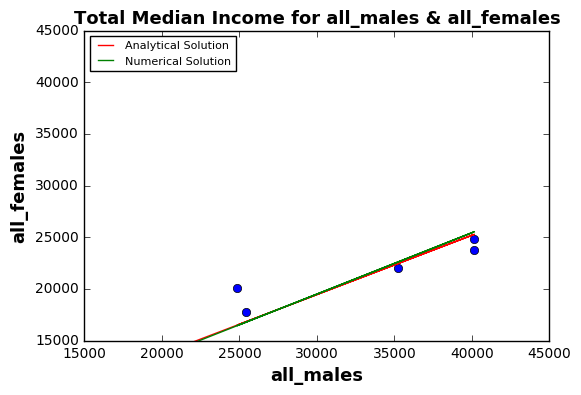

In [96]:
#change to regress line, different lines experimented

import statsmodels.formula.api as smf
plt.plot(all_males, all_females, 'o')
plt.plot(all_males, beta0 + (beta1 * all_males), '-r', label = 'Analytical Solution')

lm = smf.ols(formula = 'all_females ~ all_males', data = data_4).fit()

plt.plot(all_males, lm.predict(), label = 'Numerical Solution')

plt.xlabel('all_males', fontweight = 'bold', fontsize = 13)
plt.ylabel('all_females', fontweight = 'bold', fontsize = 13)

plt.title('Total Median Income for all_males & all_females', fontweight = 'bold', fontsize = 13)

plt.legend(loc='upper left', fontsize = 8)
plt.xlim(15000,45000)
plt.ylim(15000,45000)

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [94]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [95]:
# fit and plot...
# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?

data_5 = pd.DataFrame([all_males_allincomes[mask], all_females_allincomes[mask]], index = ['males', 'females']).T

data_5.head()

,males,females
0,35228.0,22063.0
1,39903.0,27736.0
2,40298.0,28402.0
3,19557.0,10732.0
4,2359.0,1635.0


### CAPTION: ...

In [99]:
##this was my final plot. yours do not have to look like this, 
# this is just an example for your convenience.
lm1 = smf.ols(formula = 'females ~ males', data = data_5).fit()
lm1.params

corr2 = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])

beta1_allinc = corr2[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()

beta0_allinc = all_females_allincomes[mask].mean() - beta1_allinc * all_males_allincomes[mask].mean()

beta0_allinc, beta1_allinc

(1293.7640487731387, 0.62234483903975324)

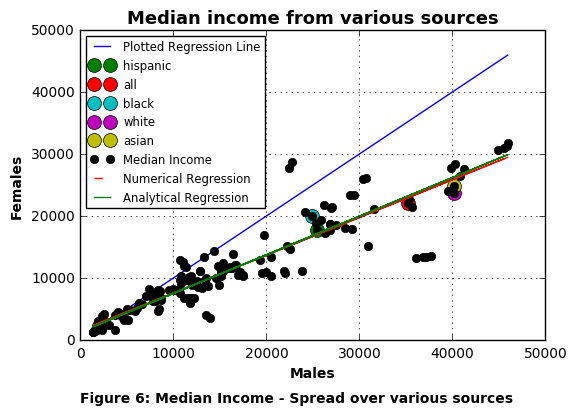

In [103]:
#Assisted by achilles, done as part of the group

the_line = np.arange(min(all_females_allincomes[mask]), max(all_males_allincomes[mask]), 0.1)
pl.plot(the_line, the_line, label = 'Plotted Regression Line')

for i in allmales:
    pl.plot(allmales[i]['Median income'][1], allfemales[i]['Median income'][1], 'o', markersize = 10, label = i)

pl.plot(all_males_allincomes[mask], all_females_allincomes[mask], 'o', label = 'Median Income')
pl.plot(data_5.males, lm1.predict(), '--r', label = 'Numerical Regression')
pl.plot(data_5.males, beta0_allinc + beta1_allinc * data_5.males, '-g', label = 'Analytical Regression')
pl.xlabel('Males', fontweight = 'bold', fontsize = 10)
pl.ylabel('Females', fontweight = 'bold', fontsize = 10)
pl.title('Median income from various sources', fontweight = 'bold', fontsize = 13)
plt.text(0,-10000,'Figure 6: Median Income - Spread over various sources', 
         fontsize = 10, fontweight = 'bold')
pl.legend(loc = 'best', fontsize = 'small')
pl.grid()

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [105]:
#Assisted by Achilles, Done as part of the group

ideal_stipend = 10000
woman_equiv = lambda m, a, b: m * a + b
print ("For %d dollars in stipend that a man makes, a woman can expect to receive %d dollars"
      %(ideal_stipend, woman_equiv(lm.params[1], ideal_stipend, lm.params[0])))


For 10000 dollars in stipend that a man makes, a woman can expect to receive 7613 dollars


In [106]:
ideal_stipend = 40000
woman_equiv = lambda m, a, b: m * a + b
print ("For %d dollars in stipend that a man makes, a woman can expect to receive %d dollars"
      %(ideal_stipend, woman_equiv(lm.params[1], ideal_stipend, lm.params[0])))


For 40000 dollars in stipend that a man makes, a woman can expect to receive 25428 dollars


# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

In [121]:
for k in allmales:
    print(str(k) + '_Males: ' + str(allmales[k]['Median income'][1]))    

print('\n')
    
for k in allfemales:
    print(str(k) + '_Females: ' + str(allfemales[k]['Median income'][1]))

hispanic_Males: 25411.0
all_Males: 35228.0
black_Males: 24855.0
white_Males: 40122.0
asian_Males: 40153.0


hispanic_Females: 17762.0
all_Females: 22063.0
black_Females: 20044.0
white_Females: 23780.0
asian_Females: 24840.0


In [122]:
#When we look at the Median incomes of different races in both genders. We observe that according to the data
#there is a disparity in pay based on the race.

#I find that median is a good indicator of the trend in this case in order to avoid the outliers from skewing the data.

#Our observation from above is that 
#Males_median: Asian > White > Hispanic > Black
#Females Median: Asian > White > Black > Hispanic

#In order to understand the disparities between races more clearly, we need to look at the distribution of incomes
#among each race to understand whether there is an actual disparity for the same particular type of job or not.
#Also, the size of the Asian population might not be as big as the other races, so we need to evaluate if there are 
#any inherent biases in the data
#Also, we can add other components like socioeconomic status to analyse the problem more thoroughly